# K Nearest Neighbour

## Details about Dataset:
### In the Data Cleaning Assignment I have came across 6 different dataset after cleaning from our raw dataset

## So We end up with 6 new datasets
1. **encoded_binary {Values with yes/no, Male/Female}**
    1. 'Gender'
    2. 'Were you a teaching assistant (TA) or research assistant(RA) during your time in NSU?'
    3. 'Did you participate in any extra curricular activities while you were studying in NSU?'
    4. 'Were you interested in coding?'
    5. 'Did you participate in any competitive programming?'
    5. 'Did you start working as a software engineer after graduation?'
    7. 'Did you have any Start-ups after graduation?'



2. **encoded_ordinal {Values that maintains an order}**
    1. 'Cumulative Grade Point Average(CGPA)',
    2. 'Number of publications',
    3. 'What was your starting salary range?' 

3. **df_PL_encoded {Programing Languages You know} [One Hot Encoding]**

4. **df_FoR_encoded {Fields of Research Interest} [One Hot Encoding]**

5. **df_FW_encoded {FrameWorks You know} [One Hot Encoding]**

6. **encoded_Dependable {Columns that maybe used as target variable}**
    1. 'Where did you start working after completing your higher studies?',
    2. 'Which country did you go to for higher studies?',
    3. 'What was the name of the University you completed your higher studies from? if answer is no write N/A.'

## So after seeing the correlation matrix in the data cleaning section I have selected the 
1. encoded_binary
2. encoded_ordinal
3. encoded_Dependable 

## Datasets to work with further. 
### So feature selection was done their (I am also attaching the Data cleaning Notebook file here)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("encBin-endOrd-encDep.csv")
df

,Gender,Were you a teaching assistant (TA) or research assistant(RA) during your time in NSU?,Did you participate in any extra curricular activities while you were studying in NSU?,Were you interested in coding?,Did you participate in any competitive programming?,Did you start working as a software engineer after graduation?,Did you have any Start-ups after graduation?,Cumulative Grade Point Average(CGPA),Number of publications,What was your starting salary range?,Where did you start working after completing your higher studies?,Which country did you go to for higher studies?,What was the name of the University you completed your higher studies from? if answer is no write N/A.
0,1,0,1,1,1,0,0,2,1,1,1,6,2
1,1,1,1,1,1,0,0,3,3,2,2,6,13
2,0,1,1,1,1,1,0,3,1,3,2,6,3
3,1,1,1,1,0,0,0,3,2,1,0,2,12
4,0,0,0,0,0,0,0,3,1,1,2,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1,0,0,0,0,0,0,3,0,1,1,3,5
60,1,0,1,1,1,1,0,3,0,0,1,3,5
61,1,1,0,1,1,1,0,3,0,0,0,1,5
62,1,1,1,1,0,1,0,3,1,2,2,3,5


# Data Visualization

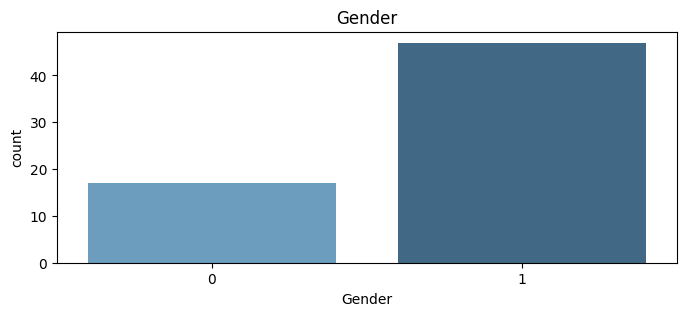

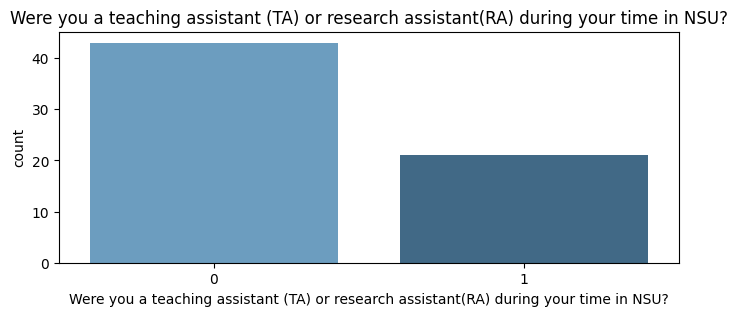

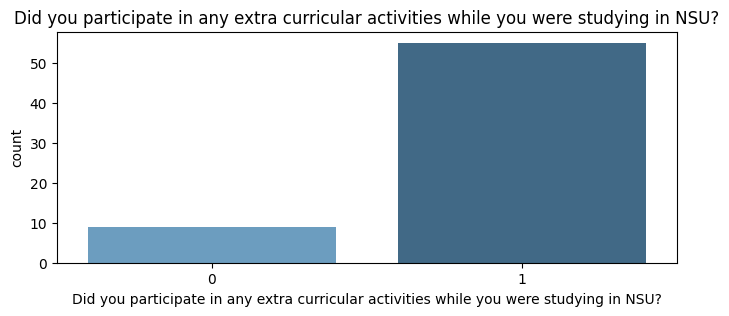

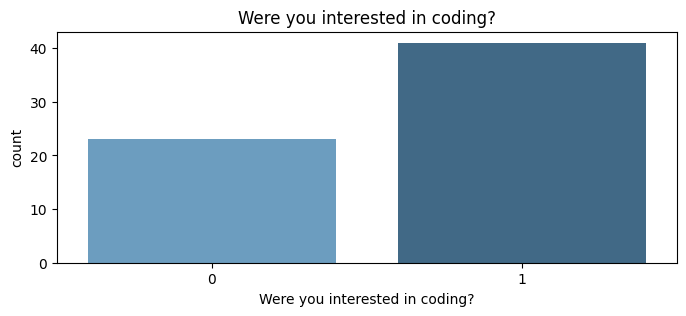

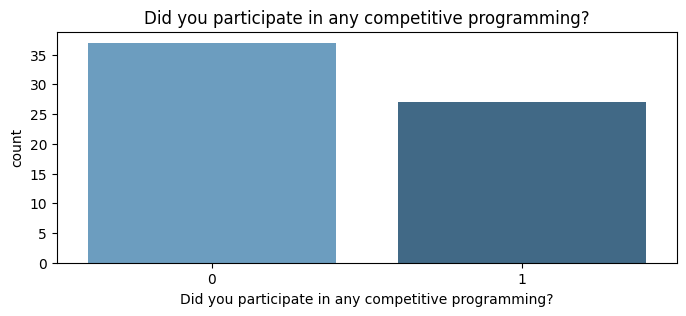

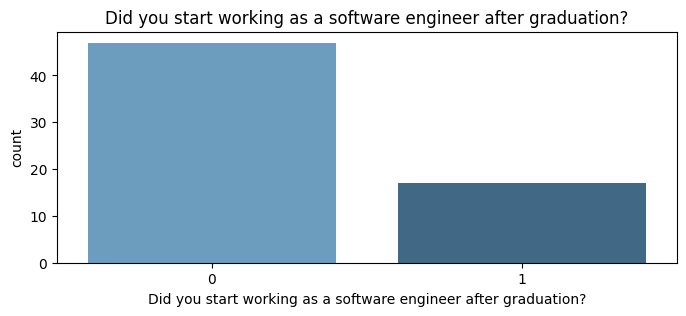

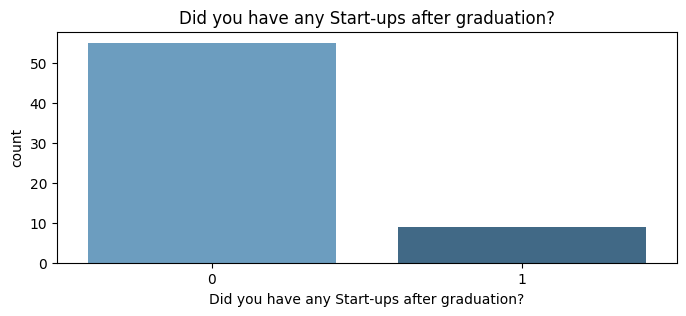

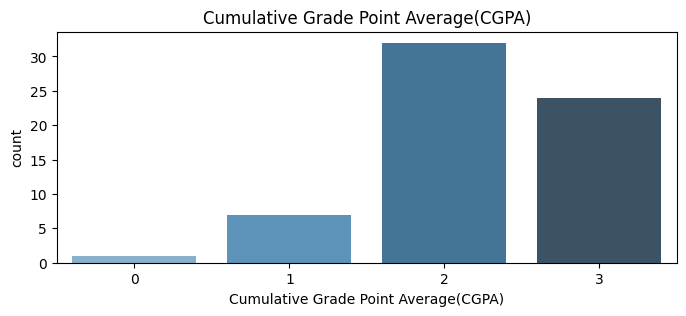

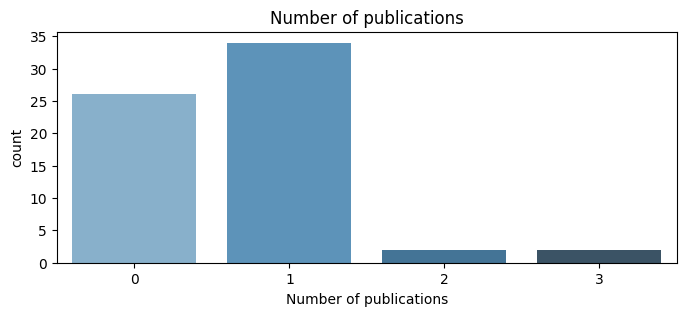

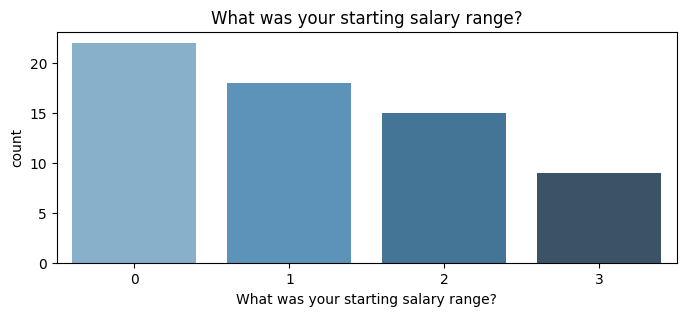

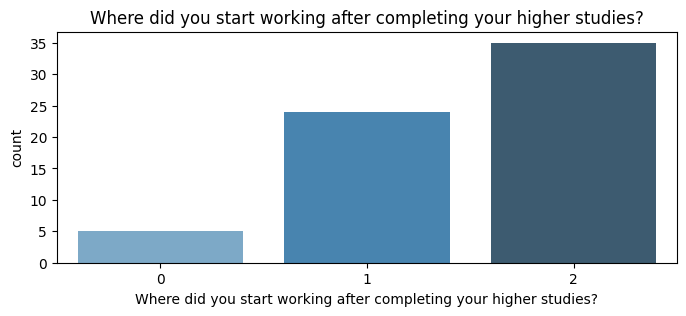

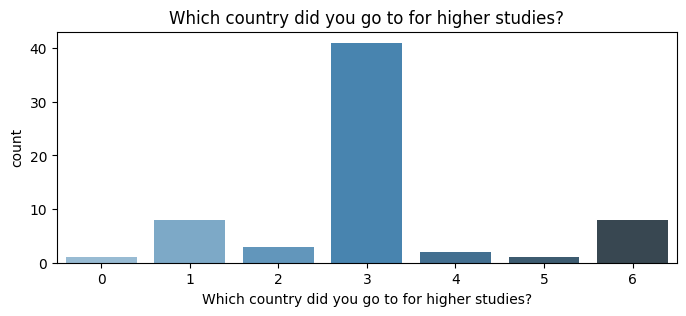

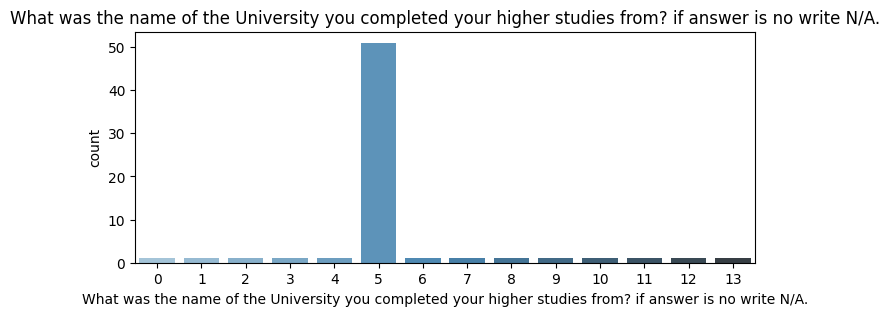

In [3]:
for i in df.columns:
    plt.figure(figsize=(8, 3))
    sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts(), palette="Blues_d")
    plt.title(i)
    plt.show()

In [4]:
df.columns

Index(['Gender',
       'Were you a teaching assistant (TA) or research assistant(RA) during your time in NSU?',
       'Did you participate in any extra curricular activities while you were studying in NSU?',
       'Were you interested in coding?',
       'Did you participate in any competitive programming?',
       'Did you start working as a software engineer after graduation?',
       'Did you have any Start-ups after graduation?',
       'Cumulative Grade Point Average(CGPA)', 'Number of publications',
       'What was your starting salary range?',
       'Where did you start working after completing your higher studies?',
       'Which country did you go to for higher studies?',
       'What was the name of the University you completed your higher studies from? if answer is no write N/A.'],
      dtype='object')

### In our 'Where did you start working after completing your higher studies?' column the unique values are: 

1. 0 for Educational institute
2. 1 for Industry
3. 2 for Not working



In [5]:
df['Where did you start working after completing your higher studies?'].unique()

array([1, 2, 0], dtype=int64)

In [6]:
df['Where did you start working after completing your higher studies?'].value_counts()

Where did you start working after completing your higher studies?
2    35
1    24
0     5
Name: count, dtype: int64

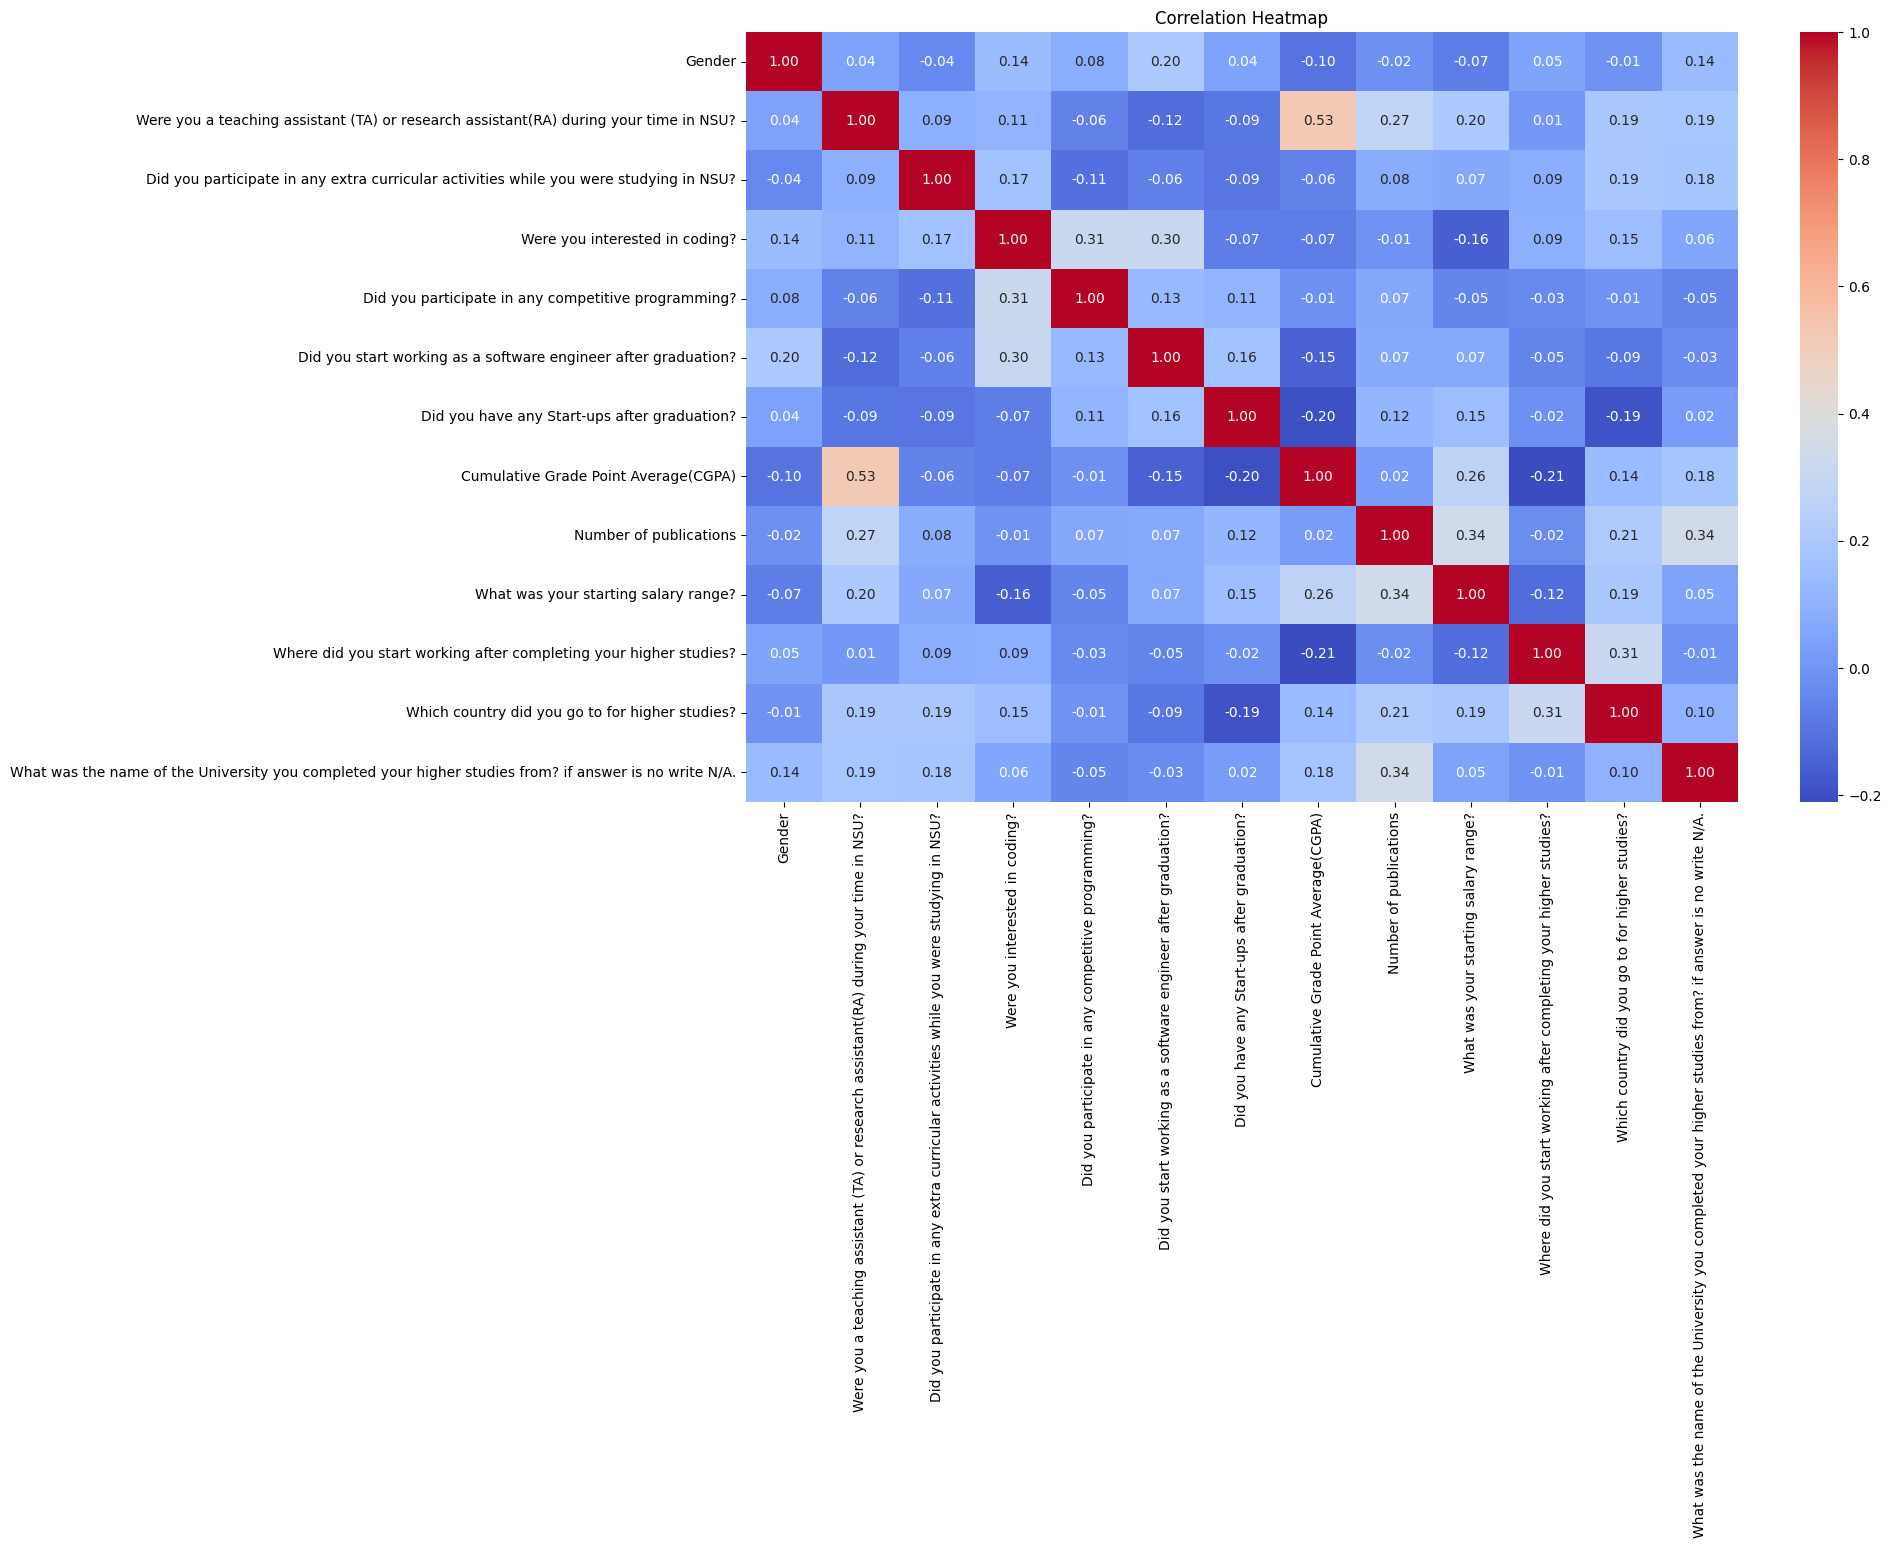

In [7]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### We can see that Some columns have really low correlation with the target variable ('Where did you start working after completing your higher studies?')
## So we drop some of the columns that are low correlated to the target variable

In [8]:
df.drop('Gender', axis=1, inplace=True)
df.drop('Were you a teaching assistant (TA) or research assistant(RA) during your time in NSU?', axis=1, inplace=True)
# df.drop('Did you participate in any competitive programming?', axis=1, inplace=True)
df.drop('Number of publications', axis=1, inplace=True)
df.drop('Did you have any Start-ups after graduation?', axis=1, inplace=True)

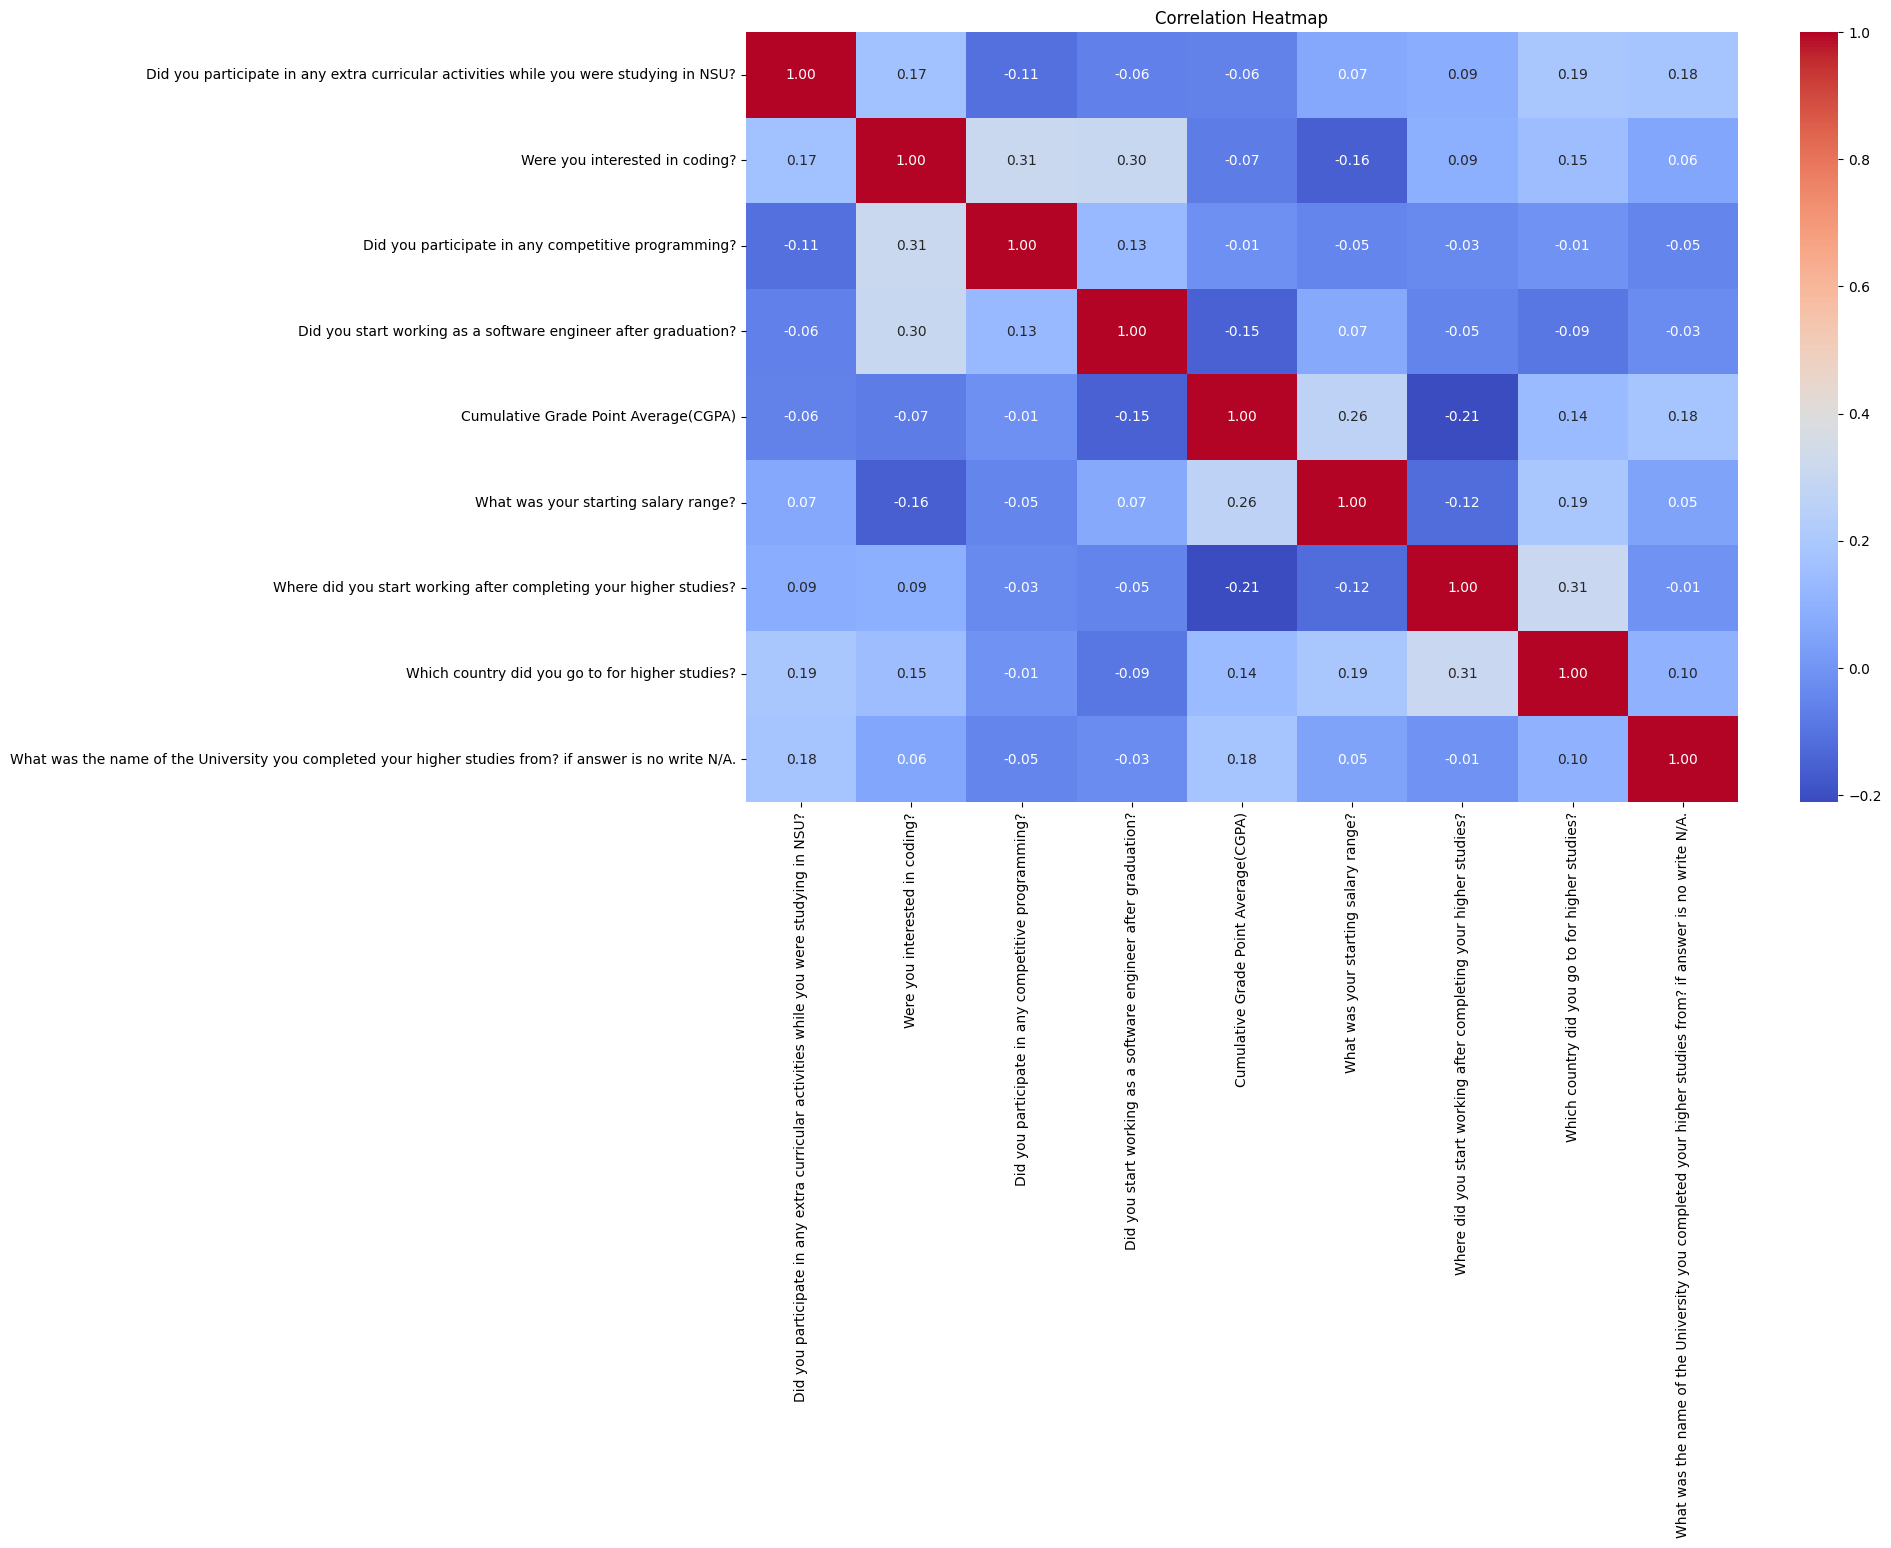

In [9]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Making Independant and Dependant Dataframes

In [10]:
X = df.drop('Where did you start working after completing your higher studies?', axis=1)

y = df['Where did you start working after completing your higher studies?']

## And splitting them into Train and Test Split
## Test size is 30% and random state is 4

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (44, 8)
X_test shape: (20, 8)
y_train shape: (44,)
y_test shape: (20,)


# Without Cross Validation and Neighbour = 5
#### Checked with few values of Neighbour but 5 gives the highest accuracy

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
# print(f"\n\n New Iteration {i+1}")

Accuracy: 0.75
Confusion Matrix:
 [[6 3]
 [2 9]]


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.75      0.67      0.71         9
           2       0.75      0.82      0.78        11

    accuracy                           0.75        20
   macro avg       0.75      0.74      0.74        20
weighted avg       0.75      0.75      0.75        20



# Got an Accuracy of 75%
## Showing the Confusion Matrix

Accuracy: 0.75
Precision: 0.75
Recall: 0.75
F1 Score: 0.748081841432225


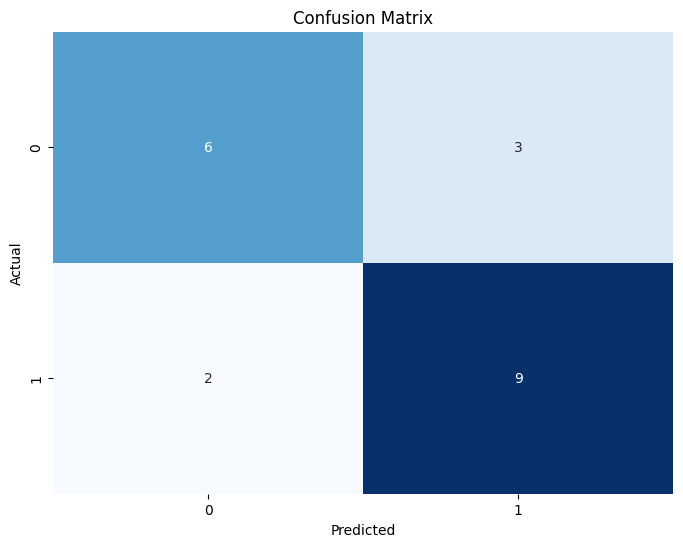

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# For different K values: Range(1-21)

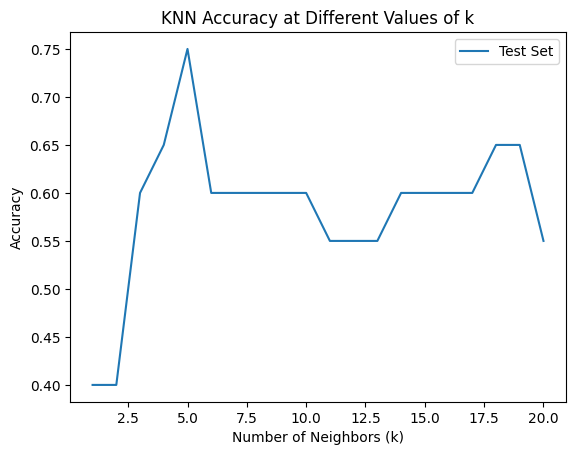

In [15]:
import warnings

# Define a filter to ignore the specific warning
def warn_ignore_attribute_error(message, category, filename, lineno, file=None, line=None):
    if "AttributeError: 'Flags' object has no attribute 'c_contiguous'" in str(message):
        return None
    else:
        return warnings.defaultaction(message, category, filename, lineno, file, line)

# Add the filter to the warnings
warnings.showwarning = warn_ignore_attribute_error

from sklearn.model_selection import cross_val_score 
from sklearn.metrics import accuracy_score
k_values = range(1, 21)

# train_accuracy = []
test_accuracy = []

for k in k_values:   
    ####################################################
    from sklearn.metrics import accuracy_score, confusion_matrix

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    
    # train_accuracy.append(mean_cv_acc)
    test_accuracy.append(accuracy)

# plt.plot(k_values, train_accuracy, label='Training Set')
plt.plot(k_values, test_accuracy, label='Test Set')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy at Different Values of k')
plt.legend()
plt.show()

# With Cross Validation [k=6] [CV=5]

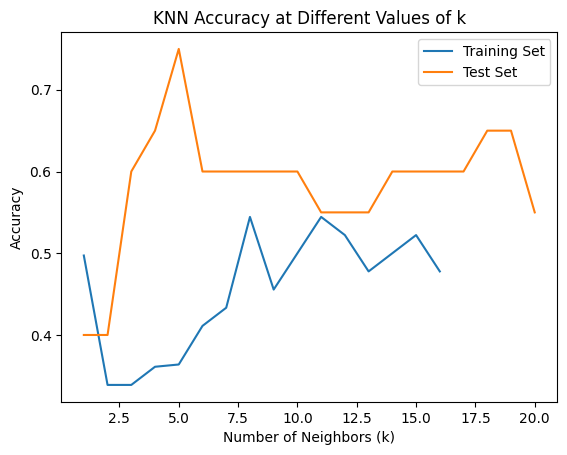

In [16]:
import warnings

# Define a filter to ignore the specific warning
def warn_ignore_attribute_error(message, category, filename, lineno, file=None, line=None):
    if "AttributeError: 'Flags' object has no attribute 'c_contiguous'" in str(message):
        return None
    else:
        return warnings.defaultaction(message, category, filename, lineno, file, line)

# Add the filter to the warnings
warnings.showwarning = warn_ignore_attribute_error

from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import accuracy_score
k_values = range(1, 21)

train_accuracy = []
test_accuracy = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    cv_knn = cross_val_score(knn, X_train, y_train, cv=5)

    mean_cv_acc = np.mean(cv_knn)

    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    train_accuracy.append(mean_cv_acc)
    test_accuracy.append(accuracy)

plt.plot(k_values, train_accuracy, label='Training Set')
plt.plot(k_values, test_accuracy, label='Test Set')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy at Different Values of k')
plt.legend()
plt.show()